In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

DB_DATA_PATH = './'
QUERY_DATA_PATH = './'

In [4]:
X_train = pd.read_csv(DB_DATA_PATH + 'db_list.csv', index_col=0)
display(X_train.head())
train_cols = X_train.columns
y_train = X_train['target'].values
X_train = X_train.drop('target', axis=1).values

X_test = pd.read_csv(QUERY_DATA_PATH + 'query_list.csv', index_col=0)
display(X_test.head())
y_test = X_test['target'].values
X_test = X_test.drop('target', axis=1).values

,dct_0,dct_1,dct_2,dct_3,dct_4,dct_5,dct_6,dct_7,dct_8,dct_9,...,dct_216,dct_217,dct_218,dct_219,dct_220,dct_221,dct_222,dct_223,dct_224,target
0,0.812763,0.272423,0.177267,0.262133,0.230776,0.255399,0.189310,0.279024,0.155362,0.268883,...,0.228107,0.209880,0.233954,0.249645,0.227619,0.223897,0.211591,0.215112,0.234028,0.0
1,0.824317,0.285164,0.189974,0.263251,0.235999,0.265722,0.199164,0.279436,0.176147,0.262119,...,0.220713,0.216296,0.215499,0.244427,0.238536,0.208056,0.222545,0.221152,0.220127,0.0
2,0.826549,0.227953,0.120643,0.218246,0.210585,0.235652,0.162152,0.232881,0.130341,0.223699,...,0.223130,0.223681,0.236513,0.228123,0.201495,0.224386,0.223604,0.231683,0.231720,0.0
3,0.806723,0.251155,0.105308,0.217036,0.183272,0.209225,0.151727,0.248162,0.129832,0.241668,...,0.225695,0.230213,0.249365,0.230700,0.204350,0.224435,0.230503,0.218306,0.228928,0.0
4,0.858456,0.247600,0.184433,0.247196,0.241287,0.259901,0.171110,0.243555,0.149487,0.252953,...,0.238263,0.211677,0.232359,0.236703,0.224809,0.216576,0.234454,0.215928,0.244901,0.0


,dct_0,dct_1,dct_2,dct_3,dct_4,dct_5,dct_6,dct_7,dct_8,dct_9,...,dct_216,dct_217,dct_218,dct_219,dct_220,dct_221,dct_222,dct_223,dct_224,target
0,0.904674,0.194109,0.130995,0.174769,0.195891,0.177870,0.152082,0.194753,0.131312,0.205085,...,0.244702,0.224199,0.213333,0.223402,0.210794,0.220879,0.234462,0.235203,0.224115,0.0
1,0.784270,0.224606,0.139211,0.248058,0.153540,0.216527,0.126956,0.223850,0.126157,0.192243,...,0.239503,0.236071,0.233055,0.233057,0.221392,0.190645,0.216429,0.212288,0.208633,0.0
2,0.876182,0.195360,0.210239,0.135471,0.247396,0.205266,0.253241,0.195721,0.188476,0.205977,...,0.229111,0.236003,0.231136,0.236494,0.230394,0.212862,0.238171,0.210575,0.218420,0.0
3,0.691964,0.134280,0.224722,0.162955,0.213020,0.245184,0.141536,0.234308,0.111738,0.229067,...,0.220245,0.221221,0.233103,0.200231,0.245400,0.235332,0.238871,0.197243,0.242605,0.0
4,0.791492,0.153364,0.171210,0.174341,0.203113,0.191042,0.189231,0.192029,0.169168,0.157802,...,0.222803,0.178768,0.241913,0.217591,0.251577,0.210878,0.220035,0.237752,0.204233,0.0


In [5]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': {'multi_error'},
    'num_class': 20,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'min_data_in_leaf': 5,
    'num_iteration': 400,
    'verbose': -1,
}

# train
cols_to_drop = ['target']
cols_to_fit = [col for col in train_cols if col not in cols_to_drop]
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_test,
                early_stopping_rounds=100)
y_pred = gbm.predict(X_test, num_iteration = gbm.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)
print(y_pred_max)
print(y_test)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_error: 0.706897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_error: 0.672414
[3]	valid_0's multi_error: 0.655172
[4]	valid_0's multi_error: 0.637931
[5]	valid_0's multi_error: 0.672414
[6]	valid_0's multi_error: 0.655172
[7]	valid_0's multi_error: 0.672414
[8]	valid_0's multi_error: 0.689655
[9]	valid_0's multi_error: 0.689655
[10]	valid_0's multi_error: 0.672414
[11]	valid_0's multi_error: 0.672414
[12]	valid_0's multi_error: 0.689655
[13]	valid_0's multi_error: 0.689655
[14]	valid_0's multi_error: 0.689655
[15]	valid_0's multi_error: 0.689655
[16]	valid_0's multi_error: 0.689655
[17]	valid_0's multi_error: 0.689655
[18]	valid_0's multi_error: 0.689655
[19]	valid_0's multi_error: 0.706897
[20]	valid_0's multi_error: 0.706897
[21]	valid_0's multi_error: 0.689655
[22]	valid_0's multi_error: 0.672414
[23]	valid_0's multi_error: 0.672414
[24]	valid_0's multi_error: 0.672414
[25]	valid_0's multi_error: 0.672414
[26]	valid_0's multi_

In [6]:
# np.savetxt('lightGBM_Base.csv',y_pred_max,delimiter=';')
accuracy = sum(y_test == y_pred_max) / len(y_test)
print(str(accuracy*100) + '%')

46.55172413793103%


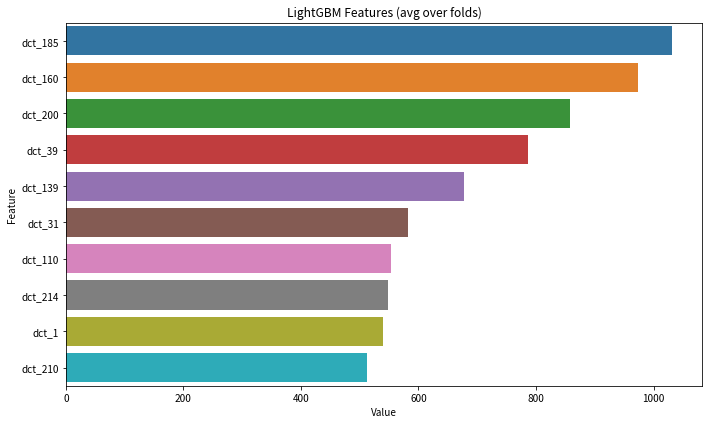

In [7]:
feature_importance = pd.DataFrame(sorted(
    zip(gbm.feature_importance(), cols_to_fit)), columns=['Value', 'Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(
    by="Value", ascending=False).head(10))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('figure.png')

In [13]:
train_df = pd.read_csv(DB_DATA_PATH + 'db_list.csv', index_col=0)
train_df["isTrain"] = True
test_df = pd.read_csv(DB_DATA_PATH + 'query_list.csv', index_col=0)
test_df["isTrain"] = False
train_test_df = pd.concat([train_df, test_df])

In [14]:
train_test_df.shape

(258, 227)

In [15]:
train_df.head()

,dct_0,dct_1,dct_2,dct_3,dct_4,dct_5,dct_6,dct_7,dct_8,dct_9,...,dct_217,dct_218,dct_219,dct_220,dct_221,dct_222,dct_223,dct_224,target,isTrain
0,0.812763,0.272423,0.177267,0.262133,0.230776,0.255399,0.189310,0.279024,0.155362,0.268883,...,0.209880,0.233954,0.249645,0.227619,0.223897,0.211591,0.215112,0.234028,0.0,True
1,0.824317,0.285164,0.189974,0.263251,0.235999,0.265722,0.199164,0.279436,0.176147,0.262119,...,0.216296,0.215499,0.244427,0.238536,0.208056,0.222545,0.221152,0.220127,0.0,True
2,0.826549,0.227953,0.120643,0.218246,0.210585,0.235652,0.162152,0.232881,0.130341,0.223699,...,0.223681,0.236513,0.228123,0.201495,0.224386,0.223604,0.231683,0.231720,0.0,True
3,0.806723,0.251155,0.105308,0.217036,0.183272,0.209225,0.151727,0.248162,0.129832,0.241668,...,0.230213,0.249365,0.230700,0.204350,0.224435,0.230503,0.218306,0.228928,0.0,True
4,0.858456,0.247600,0.184433,0.247196,0.241287,0.259901,0.171110,0.243555,0.149487,0.252953,...,0.211677,0.232359,0.236703,0.224809,0.216576,0.234454,0.215928,0.244901,0.0,True


In [17]:
feature_importance.head()

,Value,Feature
0,54,dct_131
1,66,dct_197
2,79,dct_130
3,85,dct_182
4,87,dct_219


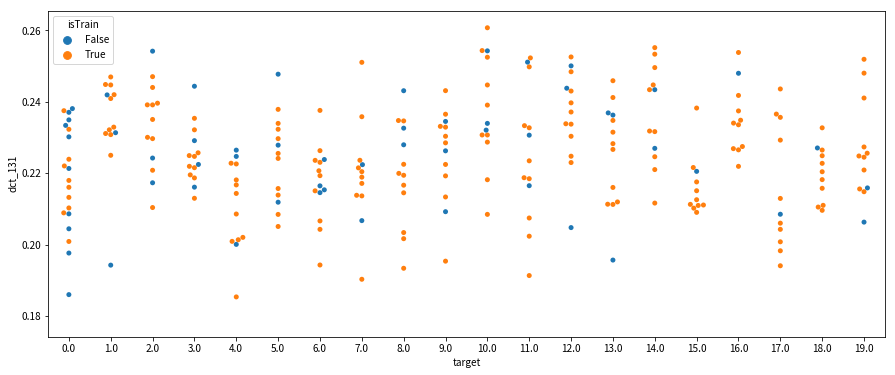

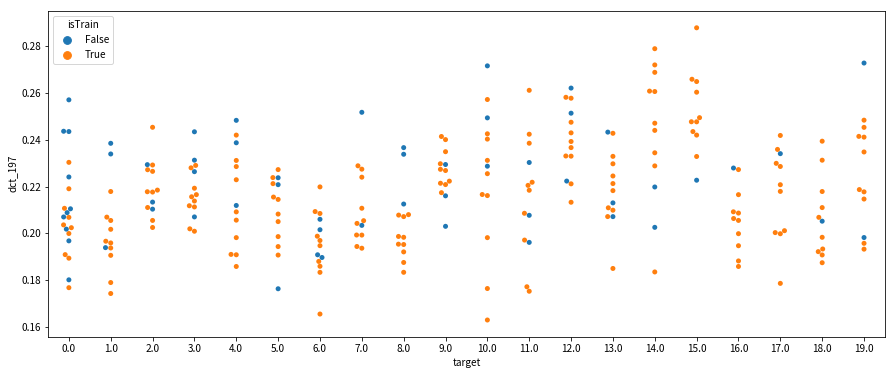

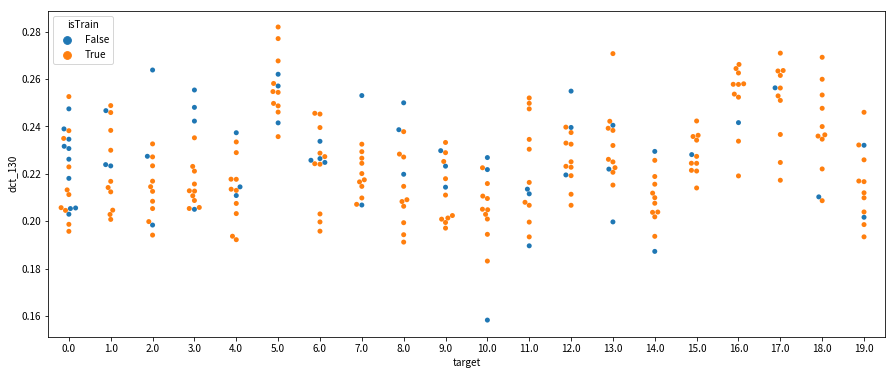

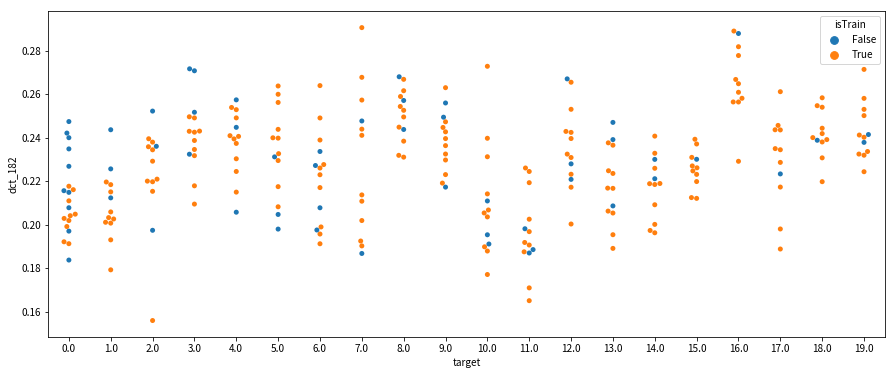

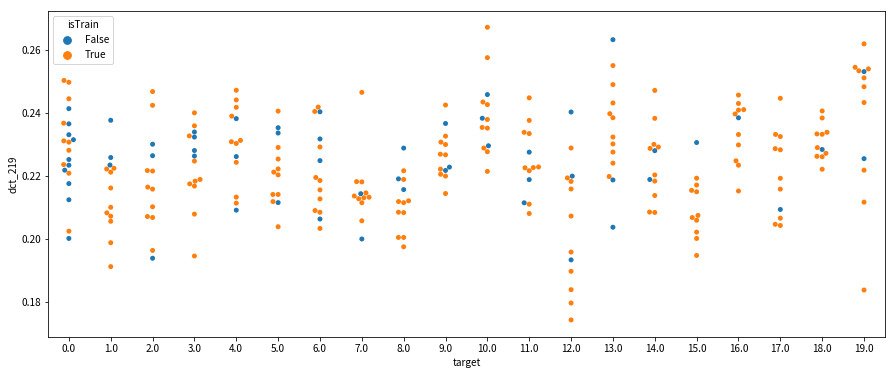

In [24]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.swarmplot(x="target", y=feature_importance.loc[i, "Feature"], data=train_test_df , ax=ax, hue="isTrain")
    plt.show()